

# Group 32
# RNN CV dataset
Aditya Kumar(T21051)
Fiza Parveen(S20009)

In [1]:
import pandas as pd
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D
import math
%matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os
import numpy as np

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import sklearn.metrics
import seaborn as sns
import random
# def set_seed(seed = 1234):
#     '''Sets the seed of the entire notebook so results are the same every time we run.
#     This is for REPRODUCIBILITY.'''
#     np.random.seed(seed)
#     random.seed(seed)
#     torch.manual_seed(seed)
#     torch.cuda.manual_seed(seed)
#     # When running on the CuDNN backend, two further options must be set
#     torch.backends.cudnn.deterministic = True
#     # Set a fixed value for the hash seed
#     os.environ['PYTHONHASHSEED'] = str(seed)
    
# set_seed()

In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (5, 5)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
def loadData(image_path,train_folder_name):
    char = []
    y =[]
    
    for filename in os.listdir(image_path):
      char_path = os.path.join(image_path, filename)
      path = os.path.join(char_path, train_folder_name)
      for file_txt in os.listdir(path):
        file_path = os.path.join(path, file_txt)
        # print(file_path)
        ch = pd.read_csv(file_path, header = None, delimiter=' ')
        # print(ch.columns)
        ch.drop(ch.columns[39], axis=1, inplace=True)
        # print(np.array(ch).T)
        char.append(np.array(ch))
        y.append(filename)

    label=[]
    for z in y:
        if z=='sa':
            label.append([1,0,0,0,0])
        if z=='tA':
            label.append([0,1,0,0,0])
        if z=='pa':
            label.append([0,0,1,0,0])
        if z=='bha':
            
            label.append([0,0,0,1,0])
        if z=='ni':
            
            label.append([0,0,0,0,1])
        
            
    charater, label = char, np.array(label).astype(np.float32)

    return charater, label

In [5]:
path = "/content/drive/My Drive/DL_ASS4_Group32/CV_Data/"

train, label = loadData(path,'Train/')

In [7]:
len(train)
#print(len(label))

5423

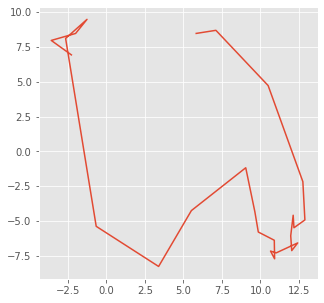

In [18]:
plt.plot(train[10][:,0],train[10][:,1])

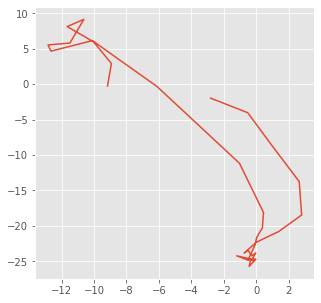

In [19]:
plt.plot(train[110][:,0],train[110][:,1])

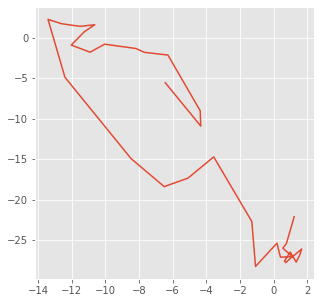

In [20]:
plt.plot(train[200][:,0],train[200][:,1])

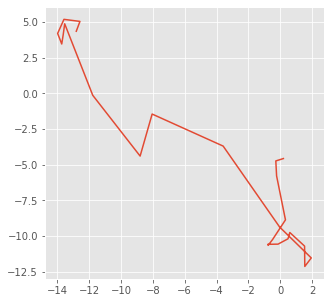

In [21]:
plt.plot(train[2000][:,0],train[2000][:,1])

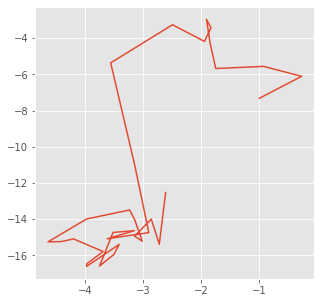

In [22]:
plt.plot(train[3100][:,0],train[3100][:,1])

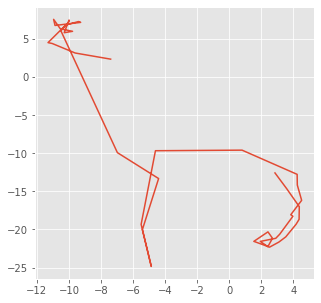

In [23]:
plt.plot(train[4200][:,0],train[4200][:,1])

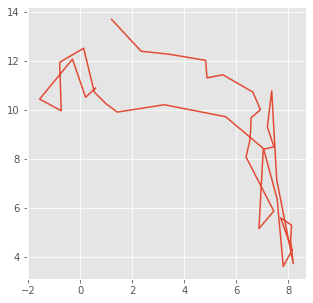

In [24]:
plt.plot(train[4800][:,0],train[4800][:,1])

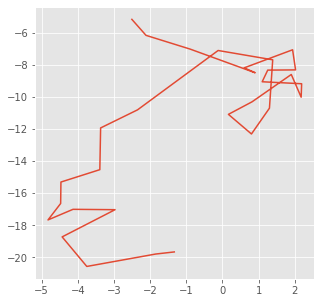

In [25]:
plt.plot(train[5200][:,0],train[5200][:,1])

In [18]:
# print( train[0] )

In [8]:
len(label)

1149

In [ ]:
# plt.plot(train[10][:,0],train[10][:,1])

In [9]:
class RNN_Char(nn.Module):
    def __init__(self, input_size, hidden_size, layer_size, output_size):
        super(RNN_Char, self).__init__()
        
        self.input_size, self.hidden_size, self.layer_size, self.output_size = input_size, hidden_size, layer_size, output_size
        
        # Step1: the RNN model
        self.rnn = nn.RNN(input_size, hidden_size)
        self.layer = nn.Linear(hidden_size, output_size)
        self.soft = nn.Softmax(dim=0)
            
            
    def forward(self, images, prints=False):
        if prints: print('images shape:', images.shape)  
          
        # RNN:
        output, _ = self.rnn(images)
        if prints: print('RNN: output shape:', output.shape, '\n')
        
        # FNN:
        output = self.layer(output[-1])
        output =self.soft(output)
        if prints: print('FNN: Final output shape:', output.shape)
        
        return output

In [10]:
input_size = 39      
hidden_size = 120   # number of hidden neurons
layer_size = 3        # number of layers
output_size = 5      # possible choices

In [11]:
# Instantiate the model
# We'll use TANH as our activation function
rnn_rnn = RNN_Char(input_size, hidden_size, layer_size, output_size)

In [12]:
## Basic
# input = torch.from_numpy(train[10])
# output=rnn_rnn(input)
# output

In [13]:
def rnn_accuracy(train):
  train_loss=0

  confusion_matrix = np.zeros((5,5))
  # print(confusion_matrix)
  epoch =10
  for i in range(len(label)-1):
    A = train[i]
    A = A.astype(np.float32)
    input =torch.from_numpy(A)
    l = label[i]
    l = l.astype(np.float32)
    l=np.argmax(l)
    lbl  =torch.tensor(l)
    optimizer.zero_grad()
    output=rnn_rnn(input)
    pre = torch.argmax(output).item()
    act = lbl.item()
    
    if pre == act :
      confusion_matrix[act][act]+=1
    else:
      confusion_matrix[act][pre]+=1

  Acc = confusion_matrix[0][0]+confusion_matrix[1][1]+confusion_matrix[2][2]+confusion_matrix[3][3]+confusion_matrix[4][4]
  Total = np.sum(confusion_matrix)
  Acc = 100* Acc/Total
  print('Accuracy: ',Acc)
  print(confusion_matrix)

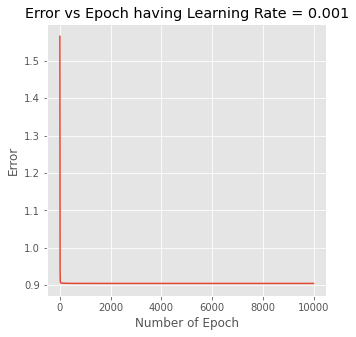

Accuracy:  35.714285714285715
[[  3. 304.   8.  21.   6.]
 [  1. 401.   4.   1.   1.]
 [  1. 195.   6.  10.   0.]
 [  0.   0.   0.   0.   0.]
 [  1. 153.  11.  21.   0.]]


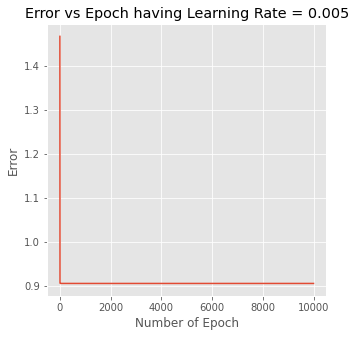

Accuracy:  36.498257839721255
[[  8. 322.  11.   0.   1.]
 [  3. 404.   1.   0.   0.]
 [  3. 202.   7.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  2. 171.  13.   0.   0.]]


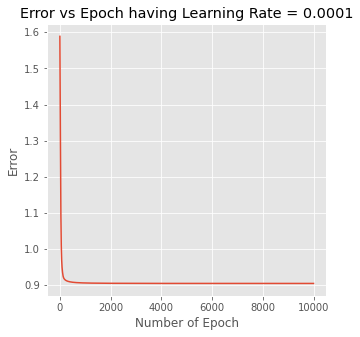

Accuracy:  35.278745644599304
[[  2. 310.   0.  26.   4.]
 [  1. 401.   2.   3.   1.]
 [  4. 191.   0.  16.   1.]
 [  0.   0.   0.   0.   0.]
 [  5. 162.   0.  17.   2.]]


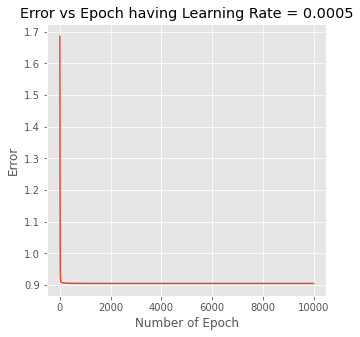

Accuracy:  35.45296167247387
[[  3. 333.   2.   3.   1.]
 [  0. 402.   0.   3.   3.]
 [  1. 209.   1.   1.   0.]
 [  0.   0.   0.   0.   0.]
 [  1. 183.   1.   0.   1.]]


In [16]:
criterion = nn.CrossEntropyLoss()
learning_rates = [ 0.001, 0.005, 0.0001, 0.0005]

for pos in range(len(learning_rates)):
  rnn_rnn = RNN_Char(input_size, hidden_size, layer_size, output_size)
  optimizer = optim.Adam(rnn_rnn.parameters(), lr=learning_rates[pos])
  losss =[]
  epoch = 10000
  preloss=0
  
  for j in range(epoch):
    train_loss=0
    for i in range(len(label)-1):

      A = train[i]
      A = A.astype(np.float32)
      input =torch.from_numpy(A)
      l = label[i]
      l = l.astype(np.float32)
      l=np.argmax(l)
      lbl  =torch.tensor(l)
      optimizer.zero_grad()
      output=rnn_rnn(input)
      
      # print(output)
      # print(lbl)

      loss = criterion(input=output, target =lbl)
      loss.backward()
      # Updates the weights
      optimizer.step()
      
      # Save Loss & Accuracy after each iteration
      train_loss += loss.item()
      losss.append(train_loss)
      preloss = train_loss

      if abs(preloss-train_loss)<=10e-4:
        break
      
    # Print Average Train Loss & Accuracy after each epoch
    # print('TRAIN | Epoch: {}/{} | Loss: {:.2f} |'.format(j+1, epoch, train_loss))

  plt.plot(losss)
  plt.xlabel("Number of Epoch")
  plt.ylabel("Error")
  plt.title("Error vs Epoch having Learning Rate = {}".format(learning_rates[pos]))
  plt.show()

  # Accuracy and Confusion matrix
  rnn_accuracy(train)

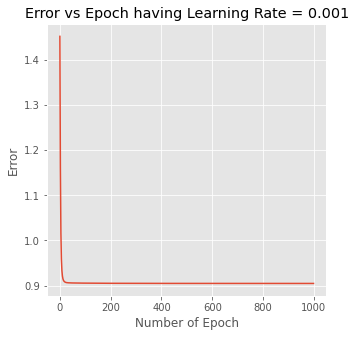

Accuracy:  35.88850174216028
[[  3. 320.   1.   3.  15.]
 [  0. 401.   5.   0.   2.]
 [  2. 204.   0.   1.   5.]
 [  0.   0.   0.   0.   0.]
 [  3. 170.   1.   4.   8.]]


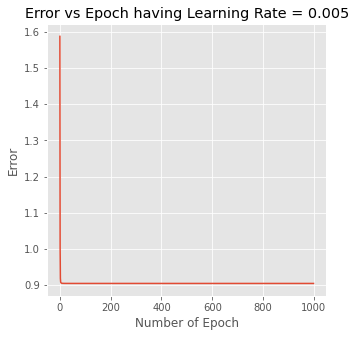

Accuracy:  35.801393728223
[[  5. 331.   2.   4.   0.]
 [  0. 406.   0.   2.   0.]
 [  1. 210.   0.   1.   0.]
 [  0.   0.   0.   0.   0.]
 [  2. 182.   0.   2.   0.]]


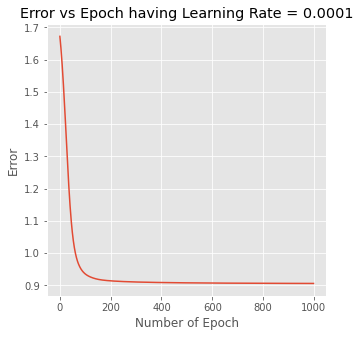

Accuracy:  37.02090592334495
[[ 30. 302.   6.   2.   2.]
 [  3. 395.   4.   2.   4.]
 [ 18. 194.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [ 25. 161.   0.   0.   0.]]


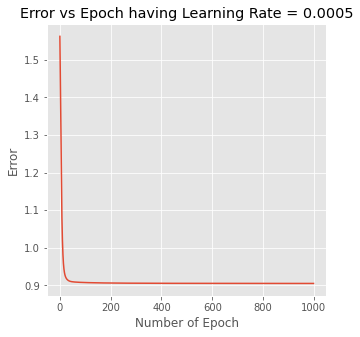

Accuracy:  37.54355400696864
[[ 16. 280.  23.  12.  11.]
 [  0. 396.   7.   2.   3.]
 [  9. 181.  11.   8.   3.]
 [  0.   0.   0.   0.   0.]
 [  7. 149.  12.  10.   8.]]


In [17]:
criterion = nn.CrossEntropyLoss()
learning_rates = [ 0.001, 0.005, 0.0001, 0.0005]

for pos in range(len(learning_rates)):
  rnn_rnn = RNN_Char(input_size, hidden_size, layer_size, output_size)
  optimizer = optim.Adam(rnn_rnn.parameters(), lr=learning_rates[pos])
  losss =[]
  epoch = 1000
  preloss=0
  
  for j in range(epoch):
    train_loss=0
    for i in range(len(label)-1):

      A = train[i]
      A = A.astype(np.float32)
      input =torch.from_numpy(A)
      l = label[i]
      l = l.astype(np.float32)
      l=np.argmax(l)
      lbl  =torch.tensor(l)
      optimizer.zero_grad()
      output=rnn_rnn(input)
      
      # print(output)
      # print(lbl)

      loss = criterion(input=output, target =lbl)
      loss.backward()
      # Updates the weights
      optimizer.step()
      
      # Save Loss & Accuracy after each iteration
      train_loss += loss.item()
      losss.append(train_loss)
      preloss = train_loss

      if abs(preloss-train_loss)<=10e-4:
        break
      
    # Print Average Train Loss & Accuracy after each epoch
    # print('TRAIN | Epoch: {}/{} | Loss: {:.2f} |'.format(j+1, epoch, train_loss))

  plt.plot(losss)
  plt.xlabel("Number of Epoch")
  plt.ylabel("Error")
  plt.title("Error vs Epoch having Learning Rate = {}".format(learning_rates[pos]))
  plt.show()

  # Accuracy and Confusion matrix
  rnn_accuracy(train)

# TEST

In [29]:
test, label = loadData(path,'Test/')

In [31]:
print(len(test))

337


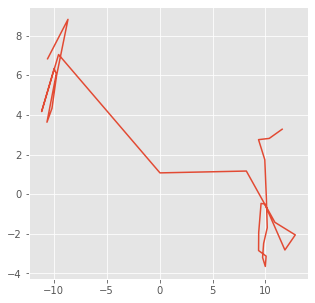

In [33]:
plt.plot(test[10][:,0],test[10][:,1])

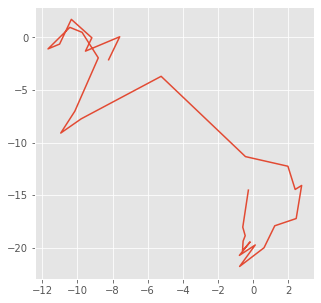

In [34]:
plt.plot(test[90][:,0],test[90][:,1])

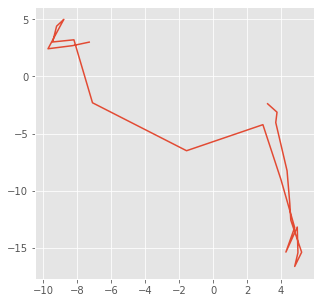

In [35]:
plt.plot(test[190][:,0],test[190][:,1])

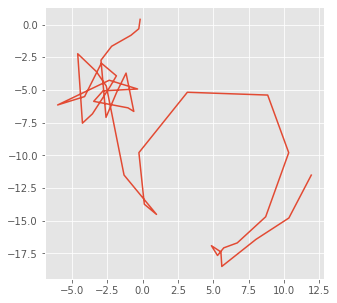

In [36]:
plt.plot(test[250][:,0],test[250][:,1])

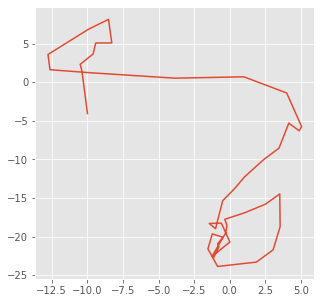

In [37]:
plt.plot(test[315][:,0],test[315][:,1])

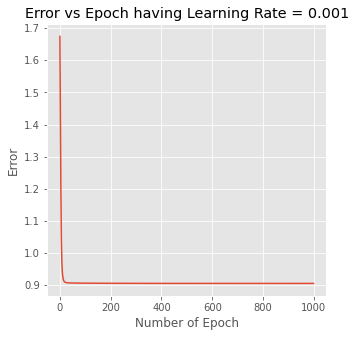

Accuracy:  36.23693379790941
[[  0.  84.   1.   0.   0.]
 [  0. 101.   0.   0.   1.]
 [  4.  49.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  1.  42.   0.   1.   3.]]


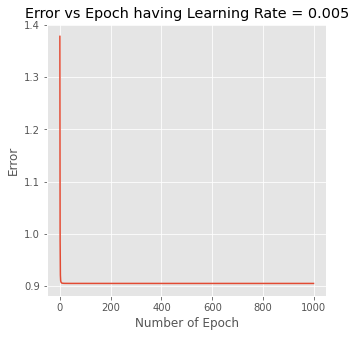

Accuracy:  35.54006968641115
[[  0.  85.   0.   0.   0.]
 [  0. 102.   0.   0.   0.]
 [  0.  52.   0.   1.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.  46.   0.   1.   0.]]


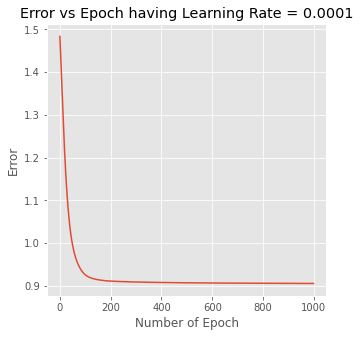

Accuracy:  35.88850174216028
[[  0.  85.   0.   0.   0.]
 [  0. 102.   0.   0.   0.]
 [  2.  51.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.  45.   0.   1.   1.]]


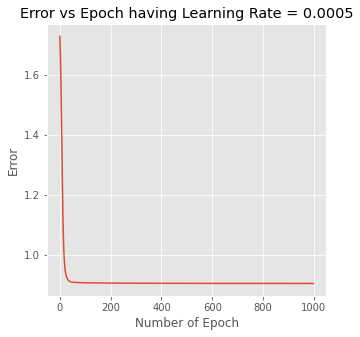

Accuracy:  36.23693379790941
[[  0.  85.   0.   0.   0.]
 [  0. 101.   0.   1.   0.]
 [  0.  50.   3.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.  46.   1.   0.   0.]]


In [38]:
criterion = nn.CrossEntropyLoss()
learning_rates = [ 0.001, 0.005, 0.0001, 0.0005]

for pos in range(len(learning_rates)):
  rnn_rnn = RNN_Char(input_size, hidden_size, layer_size, output_size)
  optimizer = optim.Adam(rnn_rnn.parameters(), lr=learning_rates[pos])
  losss =[]
  epoch = 1000
  preloss=0
  
  for j in range(epoch):
    test_loss=0
    for i in range(len(label)-1):

      A = test[i]
      A = A.astype(np.float32)
      input =torch.from_numpy(A)
      l = label[i]
      l = l.astype(np.float32)
      l=np.argmax(l)
      lbl  =torch.tensor(l)
      optimizer.zero_grad()
      output=rnn_rnn(input)
      
      # print(output)
      # print(lbl)

      loss = criterion(input=output, target =lbl)
      loss.backward()
      # Updates the weights
      optimizer.step()
      
      # Save Loss & Accuracy after each iteration
      test_loss += loss.item()
      losss.append(test_loss)
      preloss = test_loss

      if abs(preloss-test_loss)<=10e-4:
        break
      
    # Print Average Train Loss & Accuracy after each epoch
    # print('TRAIN | Epoch: {}/{} | Loss: {:.2f} |'.format(j+1, epoch, train_loss))

  plt.plot(losss)
  plt.xlabel("Number of Epoch")
  plt.ylabel("Error")
  plt.title("Error vs Epoch having Learning Rate = {}".format(learning_rates[pos]))
  plt.show()

  # Accuracy and Confusion matrix
  rnn_accuracy(test)